In [ ]:
import numpy as np
import math

In [ ]:
#Sigmoid Function
def sigmoid(x):
  activation = 1/(1 + np.exp(-x))
  return activation

In [ ]:
act = sigmoid(np.array([1,2,3]))
print(act)

[0.73105858 0.88079708 0.95257413]


In [ ]:
#Binary Cross Entropy
def BinaryCrossEntropy(train_exp, y, activation):
  eq = (y*(np.log(activation)) + (1-y)*(np.log(1-activation)));
  sum = np.sum(eq)
  loss = -(sum)/train_exp
  return loss

In [ ]:
loss = BinaryCrossEntropy(100, 3, act)
print(loss)

0.12051435530912452


In [ ]:
#Sigmoid Derivative 
def Sigmoid_derivative(x):
  derivative = sigmoid(x)*(1-sigmoid(x))
  return derivative

In [ ]:
drv = Sigmoid_derivative(np.array([3.0,1.0,0.2]))
print(drv)

[0.04517666 0.19661193 0.24751657]


In [ ]:
#Flatten the image
def Flatten(image):
  flatten = image.reshape(image.shape[0]*image.shape[1]*image.shape[2],1)
  return flatten

In [ ]:
image = np.array( [[[ 0.67826139,  0.29380381],
                  [ 0.90714982,  0.52835647],
                  [ 0.4215251 ,  0.45017551]],

                  [[ 0.92814219,  0.96677647],
                  [ 0.85304703,  0.52351845],
                  [ 0.19981397,  0.27417313]],

                  [[ 0.60659855,  0.00533165],
                  [ 0.10820313,  0.49978937],
                  [ 0.34144279,  0.94630077]]])

Image_flatten = Flatten(image)
print(Image_flatten)

[[0.67826139]
 [0.29380381]
 [0.90714982]
 [0.52835647]
 [0.4215251 ]
 [0.45017551]
 [0.92814219]
 [0.96677647]
 [0.85304703]
 [0.52351845]
 [0.19981397]
 [0.27417313]
 [0.60659855]
 [0.00533165]
 [0.10820313]
 [0.49978937]
 [0.34144279]
 [0.94630077]]


In [ ]:
#Normalize Data
def NormalizeData(x):
  normalize = x/np.linalg.norm(x,axis=1,keepdims=True)
  return normalize

In [ ]:
x = np.array([[0, 3, 4],
              [1, 6, 4]])

print(NormalizeData(x))

[[0.         0.6        0.8       ]
 [0.13736056 0.82416338 0.54944226]]


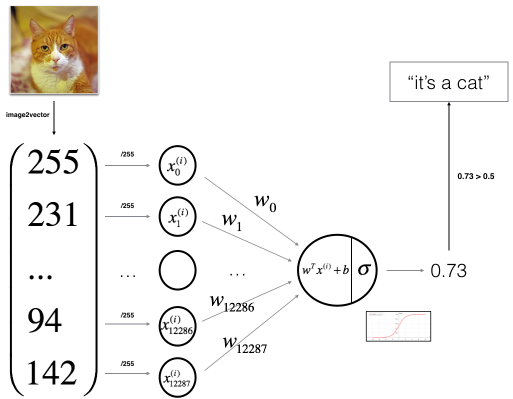

In [ ]:
#Forward & Backward Propagation
def Forward_Backward_Propagation(weights, labels, inputs, training_exp, bias):

  #forward propagation
  Z = np.dot(weights.T, inputs) + bias
  A = sigmoid(Z)
  L = BinaryCrossEntropy(training_exp, labels, A)

  #backward propagation
  dw = (1/training_exp)*np.dot(inputs, (A - labels).T)
  db = (1/training_exp)*np.sum((A - labels))

  grad = {"dw":dw, "db":db}

  return grad, L

In [ ]:
w, b, X, Y = np.array([[1.],[2.]]), 2., np.array([[1.,2.,-1.],[3.,4.,-3.2]]), np.array([[1,0,1]])
grads, cost = Forward_Backward_Propagation(w, Y, X, 3, b)
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))
print ("cost = " + str(cost))

dw = [[0.99845601]
 [2.39507239]]
db = 0.001455578136784208
cost = 5.801545319394553


In [ ]:
#Optimize function like gradient descent
def Optimize_Function(weights, labels, inputs, training_exp, bias, lr, num_iterations):

  costs = []
  for i in range(num_iterations):

    grads, loss = Forward_Backward_Propagation(weights, labels, inputs, training_exp, bias)
    dw = grads["dw"]
    db = grads["db"]

    #update parameters
    weights = weights - lr*dw
    bias = bias - lr*db

    costs.append(loss)

  parameters = {"w":weights, "b":bias}
  gradient_des = {"dw":dw, "db":db}

  return parameters, gradient_des, costs

In [ ]:
w, b, X, Y = np.array([[1.],[2.]]), 2., np.array([[1.,2.,-1.],[3.,4.,-3.2]]), np.array([[1,0,1]])
params, grads, costs = Optimize_Function(w, Y, X, 3, b, 0.009, 100)
print("weights = " + str(params["w"]))
print("bias = " + str(params["b"]))
# print("Cost = "+ str(costs))

weights = [[0.19033591]
 [0.12259159]]
bias = 1.9253598300845747


In [ ]:
#Predict the result
def Predict(parameters, training_exp, inputs):

  y_predict = []
  weights = parameters["w"]
  bias = parameters["b"]
  Z = (np.dot(weights.T, inputs) + bias)
  A = sigmoid(Z)

  for i in range(A.shape[1]):
    if A[0][i] > 0.5:
      y_predict.append(1)
    else:
      y_predict.append(0)

  return y_predict

In [ ]:
result = Predict(params, 3, X)
print(result)

[1, 1, 1]
